# Part-(1A) Imputation methods using SimpleImputer (handling numerical data),OrdinalEncoder(handling categorical data) and Standard scailing with Shuffled splitted data

In [106]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.metrics import average_precision_score
from sklearn.ensemble import AdaBoostClassifier as ab
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


from sklearn.linear_model import SGDClassifier as sg
import matplotlib.pyplot as plt
import numpy as np

In [107]:
data=pd.read_csv('Titanic_full.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


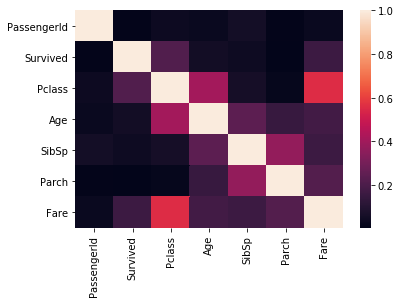

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
sns.heatmap(np.abs(corr),          # use absolute values
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [109]:
data_feat= data.drop(["Cabin","Name","Ticket"], axis=1) # drop labels for training set

In [110]:
sample_incomplete_rows = data_feat[data_feat.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q


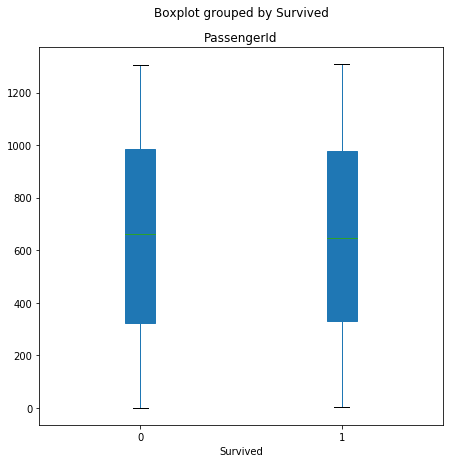

In [111]:
box = data.boxplot(column='PassengerId',by='Survived',grid=False,
patch_artist=True,figsize=(7,7))

In [112]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

In [113]:
data_num=data_feat.select_dtypes(include=[np.number])

In [114]:
imputer.fit(data_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [115]:
imputer.statistics_

array([6.55000000e+02, 3.85790680e-01, 2.29488159e+00, 2.98811377e+01,
       4.98854087e-01, 3.85026738e-01, 3.32954793e+01])

In [116]:
data_num.mean().values

array([6.55000000e+02, 3.85790680e-01, 2.29488159e+00, 2.98811377e+01,
       4.98854087e-01, 3.85026738e-01, 3.32954793e+01])

In [117]:
X = imputer.transform(data_num)
X

array([[1.00000e+00, 0.00000e+00, 3.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.25000e+00],
       [2.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.12833e+01],
       [3.00000e+00, 1.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.92500e+00],
       ...,
       [1.30700e+03, 0.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.25000e+00],
       [1.30800e+03, 1.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.05000e+00],
       [1.30900e+03, 1.00000e+00, 3.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 2.23583e+01]])

In [118]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)
data_tr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
1304,1305.0,0.0,3.0,29.881138,0.0,0.0,8.0500
1305,1306.0,1.0,1.0,39.000000,0.0,0.0,108.9000
1306,1307.0,0.0,3.0,38.500000,0.0,0.0,7.2500
1307,1308.0,1.0,3.0,29.881138,0.0,0.0,8.0500


In [119]:
data_tr.loc[sample_incomplete_rows.index.values]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6.0,0.0,3.0,29.881138,0.0,0.0,8.4583
17,18.0,1.0,2.0,29.881138,0.0,0.0,13.0000
19,20.0,1.0,3.0,29.881138,0.0,0.0,7.2250
26,27.0,0.0,3.0,29.881138,0.0,0.0,7.2250
28,29.0,1.0,3.0,29.881138,0.0,0.0,7.8792


In [120]:
imputer.strategy

'mean'

In [121]:
data_tr.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool

In [122]:
data_cat = data_feat.drop(columns=data_num)
data_cat.head(10)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [123]:
data_cat.isnull().any(axis=0)

Sex         False
Embarked     True
dtype: bool

In [124]:
data_cat['Embarked']= data_cat['Embarked'].fillna(data_cat['Embarked'].mode()[0])

Text(0.5, 0, 'Port of Embarkation')

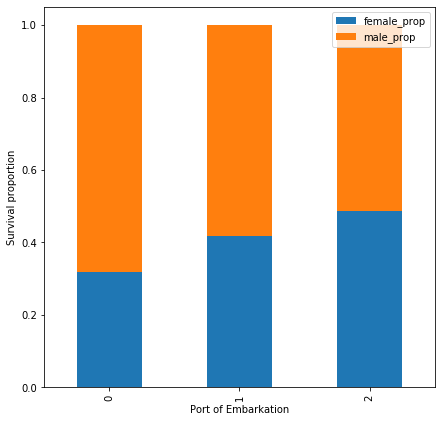

In [125]:
lst=[data_cat,data_tr]
data_analys=pd.concat(lst,axis = 1)
proportion_male = []
proportion_female = []
port = data_cat['Embarked'].unique()
for i in port:
    male_pass =  data_analys[(data_analys['Sex'] == 'male') & (data_analys['Embarked'] == i)]['PassengerId'].count()
    female_pass =  data_analys[(data_analys['Sex'] == 'female') & (data_analys['Embarked'] == i)]['PassengerId'].count()
    total_pass = data_analys[(data_analys['Embarked'] == i)]['PassengerId'].count()
    proportion_male.append(male_pass/total_pass)
    proportion_female.append(female_pass/total_pass)
    
# creating a new DataFrame with the 'Embarked' values as the indices and the proportion values as columns #
temp_df= pd.DataFrame()
temp_df= pd.DataFrame()
temp_df['female_prop'] = proportion_female
temp_df['male_prop'] = proportion_male
# Now plotting a stacked bar #
stacked_bar = temp_df.plot(kind='bar',stacked=True, figsize =(7,7))
stacked_bar.set_ylabel('Survival proportion')
stacked_bar.set_xlabel('Port of Embarkation')

In [126]:
#data_cat['Embarked'].fillna('S', inplace=True)

In [127]:
data_cat.isnull().any(axis=0)

Sex         False
Embarked    False
dtype: bool

In [128]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [129]:
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
print(data_cat_encoded.shape)
data_cat_encoded[:10]

(1309, 2)


array([[1., 2.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [1., 2.],
       [1., 1.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [0., 0.]])

In [130]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [131]:
cat_tr = pd.DataFrame(data_cat_encoded, columns=data_cat.columns,
                          index=data_cat.index)
cat_tr

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
1304,1.0,2.0
1305,0.0,0.0
1306,1.0,2.0
1307,1.0,2.0


In [132]:
data_cont=data_tr[['Age','Fare']]
data_numi=data_tr.drop(data_cont, axis=1)

In [133]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_sc = pd.DataFrame(scaler.fit_transform(data_cont))
data_sc.columns = ['Age','Fare']
print(data_sc.shape)
data_sc.head(2)

(1309, 2)


,Age,Fare
0,-0.611972,-0.503595
1,0.630431,0.734503


In [134]:
df_list = [data_numi,cat_tr,data_sc]
data_full = pd.concat(df_list,axis = 1)
data_full.drop(["PassengerId"], axis=1, inplace=True)
data_full

,Survived,Pclass,SibSp,Parch,Sex,Embarked,Age,Fare
0,0.0,3.0,1.0,0.0,1.0,2.0,-0.611972,-0.503595
1,1.0,1.0,1.0,0.0,0.0,0.0,0.630431,0.734503
2,1.0,3.0,0.0,0.0,0.0,2.0,-0.301371,-0.490544
3,1.0,1.0,1.0,0.0,0.0,2.0,0.397481,0.382925
4,0.0,3.0,0.0,0.0,1.0,2.0,0.397481,-0.488127
...,...,...,...,...,...,...,...,...
1304,0.0,3.0,0.0,0.0,1.0,2.0,0.000000,-0.488127
1305,1.0,1.0,0.0,0.0,0.0,0.0,0.708081,1.461829
1306,0.0,3.0,0.0,0.0,1.0,2.0,0.669256,-0.503595
1307,1.0,3.0,0.0,0.0,1.0,2.0,0.000000,-0.488127


In [135]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [136]:
train_valid_set, test_set = split_train_test(data_full, 0.18)
print(len(train_valid_set), "train +", len(test_set), "test")

1074 train + 235 test


In [137]:
train_set, valid_set = split_train_test(train_valid_set, 0.18)
print(len(train_set), "train +", len(valid_set), "test")

881 train + 193 test


In [138]:
train_X= train_set.drop(["Survived"],axis = 1)
train_Y = train_set["Survived"]

valid_X= valid_set.drop(["Survived"],axis = 1)
valid_Y = valid_set["Survived"]

test_X= test_set.drop(["Survived"],axis = 1)
test_Y = test_set["Survived"]

# Part2B: Gradient Boosting Implementation on Part1A preprocessed data

In [255]:
gbrt = GB(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 7)
gbrt.fit(train_X, train_Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [256]:
from sklearn.metrics import accuracy_score
y_prd = gbrt.predict(valid_X)
accuracy_score(valid_Y, y_prd.round())

0.6683937823834197

plt.figure(figsize=(12,6))
plt.title('Gradient Boosting Model')
plt.scatter(valid_Y, train_Y)
plt.plot(train_X,gbrt.predict(valid_X), color='black')
plt.show()

In [257]:
gbrt.feature_importances_

array([0.08819896, 0.08173873, 0.0344562 , 0.42843664, 0.01477629,
       0.1539834 , 0.19840978])

In [258]:
from sklearn.metrics import classification_report
print("Confusion Matrix:")
print(confusion_matrix(valid_Y, y_prd))
print()
print("Classification Report")
print(classification_report(valid_Y, y_prd))

Confusion Matrix:
[[102  25]
 [ 39  27]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       127
         1.0       0.52      0.41      0.46        66

    accuracy                           0.67       193
   macro avg       0.62      0.61      0.61       193
weighted avg       0.65      0.67      0.66       193



In [259]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gbrt.decision_function(valid_X)
fpr_gb, tpr_gb, _ = roc_curve(valid_Y, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.72


# HyperParameter Tuning(n estimators, learning rate...)

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_test_accuracy_score =[]
for learning_rate in learning_rates:
    for estimator in n_estimators:
        gb = GradientBoostingClassifier(n_estimators=estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(train_X, train_Y)
        print("Learning rate: ", learning_rate)
        print("n_estimators: ", estimator)
        print("Accuracy score (training): {0:.3f}".format(gb.score(train_X, train_Y)))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(valid_X, valid_Y)))
        print("Accuracy score (testing): {0:.3f}".format(gb.score(test_X, test_Y)))
        max_test_accuracy_score.append(gb.score(test_X, test_Y))
        print()
        

Learning rate:  0.05
n_estimators:  1
Accuracy score (training): 0.605
Accuracy score (validation): 0.658
Accuracy score (testing): 0.613

Learning rate:  0.05
n_estimators:  2
Accuracy score (training): 0.605
Accuracy score (validation): 0.658
Accuracy score (testing): 0.613

Learning rate:  0.05
n_estimators:  4
Accuracy score (training): 0.605
Accuracy score (validation): 0.658
Accuracy score (testing): 0.613

Learning rate:  0.05
n_estimators:  8
Accuracy score (training): 0.649
Accuracy score (validation): 0.648
Accuracy score (testing): 0.630

Learning rate:  0.05
n_estimators:  16
Accuracy score (training): 0.706
Accuracy score (validation): 0.699
Accuracy score (testing): 0.672

Learning rate:  0.05
n_estimators:  32
Accuracy score (training): 0.726
Accuracy score (validation): 0.705
Accuracy score (testing): 0.694

Learning rate:  0.05
n_estimators:  64
Accuracy score (training): 0.740
Accuracy score (validation): 0.679
Accuracy score (testing): 0.689

Learning rate:  0.05
n_e

In [261]:
np.argmax(max_test_accuracy_score)

25

In [262]:
from sklearn.metrics import mean_squared_error

errors = [mean_squared_error(valid_Y, y_pred)
          for y_pred in gb.staged_predict(valid_X)] 
bst_n_estimators = np.argmin(errors)
bst_n_estimators

102

# Alternate approach: Using Warm Start to get the best fit for n_estimators

In [263]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True)
min_val_error = float("inf") 
error_going_up = 0 
for n_estimators in range(1, 200):    
    gbrt.n_estimators = n_estimators    
    gbrt.fit(train_X, train_Y)    
    y_pred = gbrt.predict(valid_X)    
    val_error = mean_squared_error(valid_Y, y_pred)    
    if val_error < min_val_error:        
        min_val_error = val_error        
        error_going_up = 0   
        print (n_estimators)
    else:        
        error_going_up += 1        
        if error_going_up == 5:            
            break  # early stopping 

1
3


In [268]:
gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators,learning_rate = 0.1, random_state=7) 
gbrt_best.fit(train_X, train_Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=102,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [269]:
y_prd = gbrt_best.predict(valid_X)

In [270]:
Validation_acc= accuracy_score(valid_Y, y_prd.round())
Validation_acc

0.6839378238341969

# Evaluating test set accuracy with the trained model

In [271]:
y_tst_prd = gbrt_best.predict(test_X)
Test_acc=accuracy_score(test_Y, y_tst_prd.round())
Test_acc

0.7106382978723405

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot([1]*10, Validation_acc, ".")
plt.plot([2]*10, Test_acc, ".")
plt.boxplot([Validation_acc, Test_acc ], labels=("GB Validation Acc","GB Testing Acc"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Confusion Matrix: Testing Data
[[116  28]
 [ 40  51]]


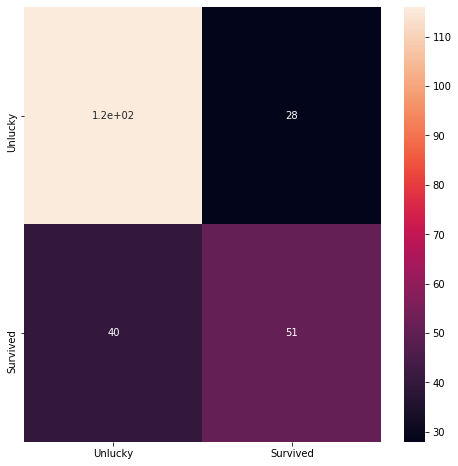

In [272]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: Testing Data")
print(confusion_matrix(test_Y, y_tst_prd.round()))
gb_cmatrix = confusion_matrix(test_Y, y_tst_prd.round())
gb_df = pd.DataFrame(gb_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(gb_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

In [273]:
print("Classification Report")
print(classification_report(test_Y, y_tst_prd.round()))

Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       144
         1.0       0.65      0.56      0.60        91

    accuracy                           0.71       235
   macro avg       0.69      0.68      0.69       235
weighted avg       0.71      0.71      0.71       235



In [274]:
# ROC curve and Area-Under-Curve (AUC)
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_tst_scores_gb = gb.decision_function(test_X)
tpr_gb,fpr_gb,_ = roc_curve(test_Y, y_tst_scores_gb)
roc_auc_gb = auc(tpr_gb,fpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.62


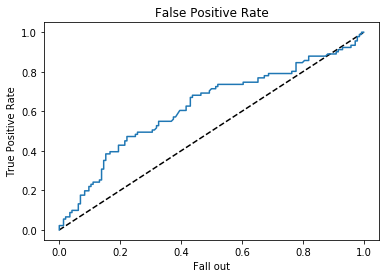

In [275]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr_gb,fpr_gb, label='GB')
plt.xlabel('Fall out')
plt.ylabel('True Positive Rate')
plt.title('False Positive Rate')
plt.show()

# Evaluating accuracy on different Classifiers

In [233]:

model_name=['RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression']
models_list= [RF(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=42),KNN(),GB(max_depth=2,n_estimators=100, learning_rate = 0.05),ab(),dt(),LR(solver='liblinear', penalty='l1')]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j,train_X, train_Y, cv=5)
    score1 = cross_val_score(j,valid_X, valid_Y, cv=5)
    score2 = cross_val_score(j,test_X, test_Y, cv=5)
    print(i+"--"+ "Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(i+"--"+ "Validation Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))
    print(i+"--"+ "testing Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
    print()

RandomForestClassifier--Training Accuracy: 0.73 (+/- 0.04)
RandomForestClassifier--Validation Accuracy: 0.70 (+/- 0.04)
RandomForestClassifier--testing Accuracy: 0.67 (+/- 0.10)

KNeighborsClassifier--Training Accuracy: 0.69 (+/- 0.05)
KNeighborsClassifier--Validation Accuracy: 0.64 (+/- 0.09)
KNeighborsClassifier--testing Accuracy: 0.63 (+/- 0.07)

GradientBoostingClassifier--Training Accuracy: 0.72 (+/- 0.03)
GradientBoostingClassifier--Validation Accuracy: 0.69 (+/- 0.09)
GradientBoostingClassifier--testing Accuracy: 0.67 (+/- 0.08)

AdaBoostClassifier--Training Accuracy: 0.72 (+/- 0.08)
AdaBoostClassifier--Validation Accuracy: 0.65 (+/- 0.12)
AdaBoostClassifier--testing Accuracy: 0.61 (+/- 0.12)

DecisionTreeClassifier--Training Accuracy: 0.67 (+/- 0.04)
DecisionTreeClassifier--Validation Accuracy: 0.62 (+/- 0.17)
DecisionTreeClassifier--testing Accuracy: 0.57 (+/- 0.10)

LogisticRegression--Training Accuracy: 0.72 (+/- 0.02)
LogisticRegression--Validation Accuracy: 0.68 (+/- 0.04)

# Part3: Evaluating increasing the number of decision trees (n_estimators), increases classifier performance and/or generalizability.

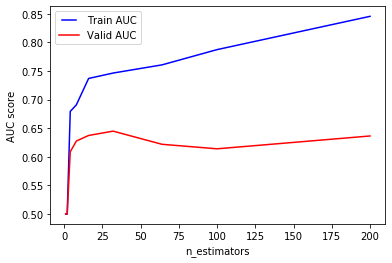

In [276]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
valid_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(train_X, train_Y)
    
    train_pred=model.predict(train_X)
    fpr, tpr, thresholds= roc_curve(train_Y,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    
    y_pred=model.predict(valid_X)
    fpr_v, tpr_v, thresholds= roc_curve(valid_Y,y_pred)
    roc_auc_v = auc(fpr_v, tpr_v)
    valid_results.append(roc_auc_v)
    
  
line1, =plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, =plt.plot(n_estimators, valid_results, 'r', label="Valid AUC")


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

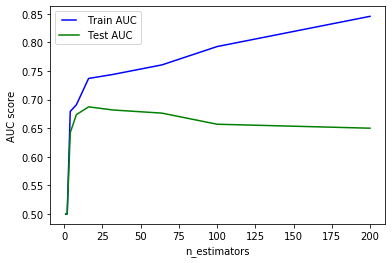

In [277]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(train_X, train_Y)
    
    train_pred=model.predict(train_X)
    fpr, tpr, thresholds= roc_curve(train_Y,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    
    y_prd_test=model.predict(test_X)
    fpr_t, tpr_t, thresholds= roc_curve(test_Y,y_prd_test)
    roc_auc_t = auc(fpr_t, tpr_t)
    test_results.append(roc_auc_t)
    
line1, =plt.plot(n_estimators, train_results, 'b', label="Train AUC")    
line3, =plt.plot(n_estimators, test_results, 'g', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


# Hence increasing the number of estimators may result in overfitting also. In our case, using 32 trees is optimal.

# Part-(1B) Imputation methods using Pivot table(handling numerical data),One Hot Encoder(handling categorical data) and minmax scailing

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [62]:
data=pd.read_csv('Titanic_full.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


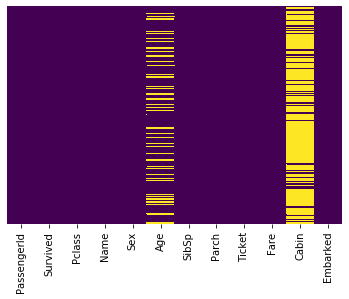

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#data.apply(lambda x: sum(x.isnull()))

In [64]:
data.apply(lambda x: len(x.unique()))

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              99
SibSp             7
Parch             8
Ticket          929
Fare            282
Cabin           187
Embarked          4
dtype: int64

In [65]:
data.groupby(by='Survived',as_index =True).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,804,804,804,804,628,804,804,804,803,131,804
1,505,505,505,505,418,505,505,505,505,164,503


In [66]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [67]:
[x for x in categorical_columns if x not in ['Name','Ticket', 'Cabin']]

['Sex', 'Embarked']

In [68]:
for col in categorical_columns:
    print (data[col].value_counts())

Connolly, Miss. Kate                                2
Kelly, Mr. James                                    2
Jensen, Mr. Hans Peder                              1
Cribb, Miss. Laura Alice                            1
Eitemiller, Mr. George Floyd                        1
                                                   ..
Midtsjo, Mr. Karl Albert                            1
Farthing, Mr. John                                  1
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")    1
Bracken, Mr. James H                                1
Andersson, Miss. Ellis Anna Maria                   1
Name: Name, Length: 1307, dtype: int64
male      843
female    466
Name: Sex, dtype: int64
CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
3101295          7
                ..
349233           1
PP 4348          1
330923           1
345498           1
113807           1
Name: Ticket, Length: 929, dtype: int64
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D  

             Fare
Pclass           
1       87.508992
2       21.179196
3       13.302889


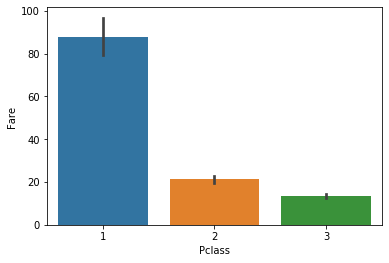

In [69]:
#Determine the average fare per class:
item_fare_class = data.pivot_table(values='Fare', index='Pclass')
print(item_fare_class)
sns.barplot(x='Pclass', y='Fare', data=data)

In [70]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Fare'].isnull()
data.loc[miss_bool,'Fare']

1043   NaN
Name: Fare, dtype: float64

In [71]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Fare']= data.loc[miss_bool,'Pclass'].apply(lambda x: item_fare_class.loc[x])
print ('Final #missing: %d'% sum(data['Fare'].isnull()))

Orignal #missing: 1
Final #missing: 0


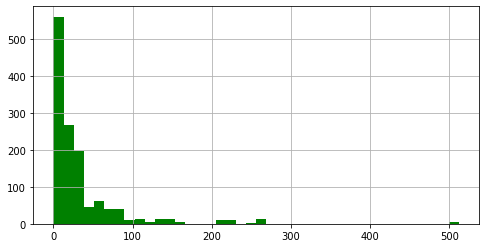

In [72]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [73]:
#Import mode function:
from scipy.stats import mode

In [74]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [75]:
data_cat['Embarked']= data_cat['Embarked'].fillna(data_cat['Embarked'].mode()[0])

In [76]:
#data['Embarked'].mode, inplace=True).apply(lambda x: x.data['Embarked']
#cols_mode = ['race', 'goal', 'date', 'go_out', 'career_c']
#df[cols_mode].apply(lambda x: x.fillna(x.mode, inplace=True))

         Age
Pclass      
1       39.0
2       29.0
3       24.0


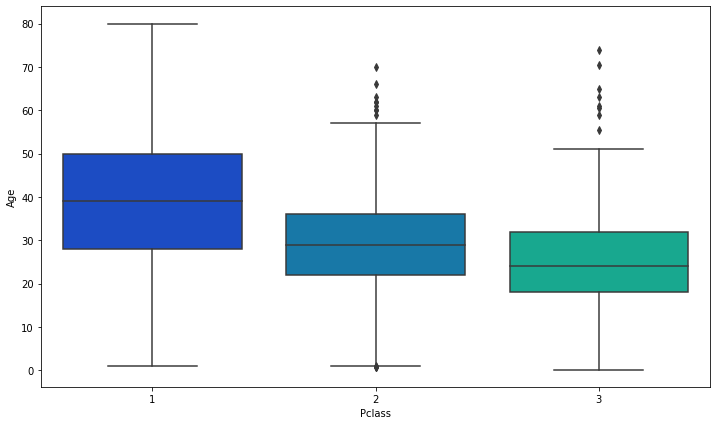

In [77]:
age_grp=data.pivot_table(values='Age', index='Pclass', aggfunc='median')
print(age_grp)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [78]:
#Impute data and check #missing values before and after imputation to confirm
miss_val = data['Age'].isnull()
print ('Orignal #missing: %d'% sum(miss_val))
data.loc[miss_val,'Age']= data.loc[miss_val,'Pclass'].apply(lambda x: age_grp.loc[x])
print ('Final #missing: %d'% sum(data['Age'].isnull()))

Orignal #missing: 263
Final #missing: 0


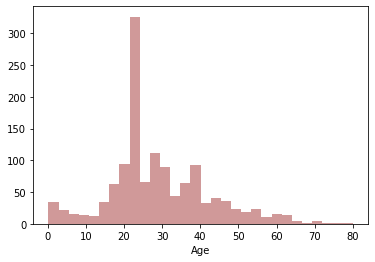

In [79]:
sns.distplot(data['Age'],bins=30,color='darkred',kde=False)

In [80]:
data.drop(columns=['PassengerId','Name','Cabin','Ticket'],inplace=True)

#Import library:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
var_mod = ['Sex','Embarked']
for i in var_mod:
    data[i] = label_encoder.fit_transform(data[i])

In [81]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,24.0,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,1,3,male,24.0,0,0,8.0500,S


In [82]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Sex','Embarked'])
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,24.0,0,0,8.0500,0,1,0,0,1
1305,1,1,39.0,0,0,108.9000,1,0,1,0,0
1306,0,3,38.5,0,0,7.2500,0,1,0,0,1
1307,1,3,24.0,0,0,8.0500,0,1,0,0,1


In [83]:
#continuous_columns = [x for x in data.dtypes.index if data.dtypes[x]=='float64']
#continuous_columns=data[['Age', 'Fare']]
X_con= data[["Age","Fare"]]
X_cat = data.drop(X_con,axis = 1)


In [84]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_con_sc = pd.DataFrame(scaler.fit_transform(X_con))
X_con_sc.columns = ["Age","Fare"]
print(X_con_sc.shape)
X_con_sc.head(2)

(1309, 2)


,Age,Fare
0,0.273456,0.014151
1,0.473882,0.139136


In [85]:
df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full.head()

(1309, 11)


,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,0.273456,0.014151
1,1,1,1,0,1,0,1,0,0,0.473882,0.139136
2,1,3,0,0,1,0,0,0,1,0.323563,0.015469
3,1,1,1,0,1,0,0,0,1,0.436302,0.103644
4,0,3,0,0,0,1,0,0,1,0.436302,0.015713


In [86]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(data,1100)

print(mydf_train_valid.shape,mydf_test.shape)

(1100, 11) (209, 11)


In [87]:
Y = mydf_train_valid["Survived"]
X = mydf_train_valid.drop(["Survived"],axis = 1)

In [88]:
X_train,X_valid = mydf_splitter(X,900)
Y_train,Y_valid = mydf_splitter(Y,900)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(900, 10) (200, 10) (900,) (200,)


In [89]:
x_tst= mydf_test.drop(["Survived"],axis = 1)
y_tst = mydf_test["Survived"]

# Part2B: Gradient Boosting Implementation on Part1A preprocessed data

In [278]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_features=2, max_depth = 2, random_state = 7) 
gbrt.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [279]:
y_prd = gbrt.predict(X_valid)
accuracy_score(Y_valid, y_prd)


0.515

In [280]:
gbrt.feature_importances_

array([0.17445524, 0.11321155, 0.05953588, 0.06057901, 0.09957403,
       0.02096039, 0.3975941 , 0.02180415, 0.00159404, 0.0506916 ])

In [281]:
from sklearn.metrics import classification_report
print("Confusion Matrix:")
print(confusion_matrix(Y_valid, y_prd))
print()
print("Classification Report")
print(classification_report(Y_valid, y_prd))

Confusion Matrix:
[[79 53]
 [44 24]]

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       132
           1       0.31      0.35      0.33        68

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.53      0.52      0.52       200



In [282]:
# ROC curve and Area-Under-Curve (AUC)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_scores = gbrt.decision_function(X_valid)
fpr_gb, tpr_gb, _ = roc_curve(Y_valid, y_scores)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.49


# HyperParameter Tuning(n estimators, learning rate...)

In [283]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.001,0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for learning_rate in learning_rates:
    for estimator in n_estimators:
        gb = GradientBoostingClassifier(n_estimators=estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train, Y_train)
        print("Learning rate: ", learning_rate)
        print("n_estimators: ", estimator)
        print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(X_valid, Y_valid)))
        print("Accuracy score (testing): {0:.3f}".format(gb.score(x_tst, y_tst)))
        print()

Learning rate:  0.001
n_estimators:  1
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  2
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  4
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  8
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  16
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  32
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0.001
n_estimators:  64
Accuracy score (training): 0.616
Accuracy score (validation): 0.660
Accuracy score (testing): 0.565

Learning rate:  0

Learning rate:  0.75
n_estimators:  64
Accuracy score (training): 0.864
Accuracy score (validation): 0.545
Accuracy score (testing): 0.483

Learning rate:  0.75
n_estimators:  100
Accuracy score (training): 0.896
Accuracy score (validation): 0.530
Accuracy score (testing): 0.483

Learning rate:  0.75
n_estimators:  200
Accuracy score (training): 0.919
Accuracy score (validation): 0.535
Accuracy score (testing): 0.469

Learning rate:  1
n_estimators:  1
Accuracy score (training): 0.759
Accuracy score (validation): 0.460
Accuracy score (testing): 0.483

Learning rate:  1
n_estimators:  2
Accuracy score (training): 0.784
Accuracy score (validation): 0.515
Accuracy score (testing): 0.493

Learning rate:  1
n_estimators:  4
Accuracy score (training): 0.790
Accuracy score (validation): 0.510
Accuracy score (testing): 0.493

Learning rate:  1
n_estimators:  8
Accuracy score (training): 0.821
Accuracy score (validation): 0.515
Accuracy score (testing): 0.498

Learning rate:  1
n_estimators:  1

In [284]:
import numpy as np 
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(Y_valid, y_pred)
          for y_pred in gb.staged_predict(X_valid)]
bst_n_estimators=np.argmin(errors)
bst_n_estimators

180

In [285]:
gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, learning_rate=0.001,random_state=7) 
gbrt_best.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [286]:
y_vld_prd = gbrt_best.predict(X_valid)
accuracy_score(Y_valid, y_vld_prd.round())

0.66

# Evaluating test set accuracy with the trained model

In [287]:
y_tst_prd = gbrt_best.predict(x_tst)
accuracy_score(y_tst, y_tst_prd.round())

0.5645933014354066

Confusion Matrix: Testing Data
[[118   0]
 [ 91   0]]


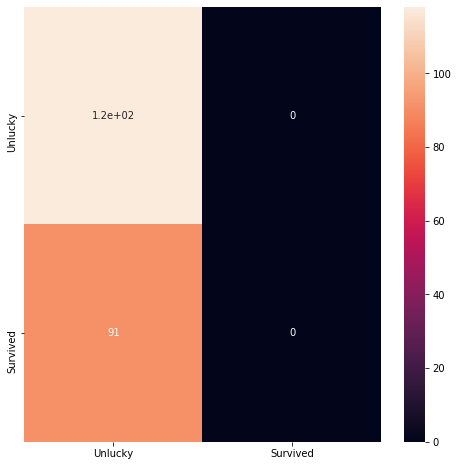

In [288]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: Testing Data")
print(confusion_matrix(y_tst, y_tst_prd.round()))
gb_cmatrix = confusion_matrix(y_tst, y_tst_prd.round())
gb_df = pd.DataFrame(gb_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(gb_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

In [289]:
# print("Classification Report")
print(classification_report(y_tst, y_tst_prd.round()))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       118
           1       0.00      0.00      0.00        91

    accuracy                           0.56       209
   macro avg       0.28      0.50      0.36       209
weighted avg       0.32      0.56      0.41       209



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluating accuracy on different Classifiers

In [291]:

model_name=['RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression']
models_list= [RF(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, random_state=42),KNN(),GB(max_depth=4,n_estimators=100),ab(),dt(),LR(solver='liblinear', penalty='l1')]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X_train, Y_train, cv=5)
    score1 = cross_val_score(j, X_valid, Y_valid, cv=5)
    score2 = cross_val_score(j,x_tst, y_tst, cv=5)
    print(i+"--"+ "Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(i+"--"+ "Validation Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))
    print(i+"--"+ "testing Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
    print()

RandomForestClassifier--Training Accuracy: 0.82 (+/- 0.03)
RandomForestClassifier--Validation Accuracy: 0.59 (+/- 0.08)
RandomForestClassifier--testing Accuracy: 0.48 (+/- 0.10)

KNeighborsClassifier--Training Accuracy: 0.69 (+/- 0.05)
KNeighborsClassifier--Validation Accuracy: 0.58 (+/- 0.07)
KNeighborsClassifier--testing Accuracy: 0.63 (+/- 0.09)

GradientBoostingClassifier--Training Accuracy: 0.84 (+/- 0.04)
GradientBoostingClassifier--Validation Accuracy: 0.56 (+/- 0.14)
GradientBoostingClassifier--testing Accuracy: 0.52 (+/- 0.15)

AdaBoostClassifier--Training Accuracy: 0.80 (+/- 0.05)
AdaBoostClassifier--Validation Accuracy: 0.59 (+/- 0.04)
AdaBoostClassifier--testing Accuracy: 0.53 (+/- 0.18)

DecisionTreeClassifier--Training Accuracy: 0.77 (+/- 0.03)
DecisionTreeClassifier--Validation Accuracy: 0.52 (+/- 0.16)
DecisionTreeClassifier--testing Accuracy: 0.58 (+/- 0.19)

LogisticRegression--Training Accuracy: 0.79 (+/- 0.03)
LogisticRegression--Validation Accuracy: 0.66 (+/- 0.07)

# Part3: Evaluating increasing the number of decision trees (n_estimators), increases classifier performance and/or generalizability.

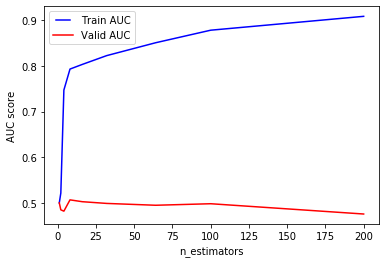

In [292]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
valid_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, Y_train)
    
    train_pred=model.predict(X_train)
    fpr, tpr, thresholds= roc_curve(Y_train,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    
    y_pred=model.predict(X_valid)
    fpr_v, tpr_v, thresholds= roc_curve(Y_valid,y_pred)
    roc_auc_v = auc(fpr_v, tpr_v)
    valid_results.append(roc_auc_v)
    
  
line1, =plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, =plt.plot(n_estimators, valid_results, 'r', label="Valid AUC")


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

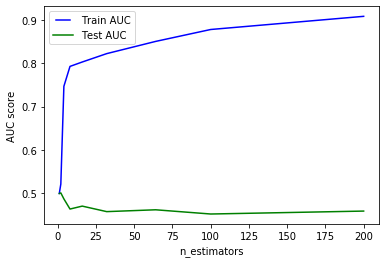

In [293]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, Y_train)
    
    train_pred=model.predict(X_train)
    fpr, tpr, thresholds= roc_curve(Y_train,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    
    y_prd_test=model.predict(x_tst)
    fpr_t, tpr_t, thresholds= roc_curve(y_tst,y_prd_test)
    roc_auc_t = auc(fpr_t, tpr_t)
    test_results.append(roc_auc_t)
    
line1, =plt.plot(n_estimators, train_results, 'b', label="Train AUC")    
line3, =plt.plot(n_estimators, test_results, 'g', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

# Hence increasing the number of estimators may result in overfitting also. In our case, using 32 trees is optimal.